## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

#### 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Batch Size = {}".format(bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-batch-size-{}".format(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0804 13:43:37.264999  5308 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0804 13:43:37.267999  5308 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0804 13:43:37.294000  5308 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 13:43:37.296000  5308 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 13:43:37.299000  5308 deprecat

Experiment with Batch Size = 2


W0804 13:43:37.575000  5308 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 13:43:37.661000  5308 deprecation.py:323] From C:\Users\Hui\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 307s 6ms/step - loss: 2.2455 - acc: 0.1551 - val_loss: 3.2578 - val_acc: 0.1610
Epoch 50/50
50000/50000 [==============================] - 307s 6ms/step - loss: 2.2515 - acc: 0.1526 - val_loss: 3.6446 - val_acc: 0.1973
Experiment with Batch Size = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)  

50000/50000 [==============================] - 41s 811us/step - loss: 1.1273 - acc: 0.5998 - val_loss: 1.3528 - val_acc: 0.5287
Epoch 48/50
50000/50000 [==============================] - 41s 812us/step - loss: 1.1224 - acc: 0.6000 - val_loss: 1.3904 - val_acc: 0.5222
Epoch 49/50
50000/50000 [==============================] - 41s 812us/step - loss: 1.1206 - acc: 0.6012 - val_loss: 1.3713 - val_acc: 0.5287
Epoch 50/50
50000/50000 [==============================] - 41s 812us/step - loss: 1.1162 - acc: 0.6046 - val_loss: 1.3703 - val_acc: 0.5236
Experiment with Batch Size = 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (B

50000/50000 [==============================] - 22s 447us/step - loss: 0.8305 - acc: 0.7022 - val_loss: 1.5806 - val_acc: 0.4953
Epoch 46/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.8202 - acc: 0.7072 - val_loss: 1.6217 - val_acc: 0.4829
Epoch 47/50
50000/50000 [==============================] - 22s 444us/step - loss: 0.8147 - acc: 0.7061 - val_loss: 1.6053 - val_acc: 0.5025
Epoch 48/50
50000/50000 [==============================] - 23s 450us/step - loss: 0.8256 - acc: 0.7046 - val_loss: 1.5803 - val_acc: 0.4947
Epoch 49/50
50000/50000 [==============================] - 23s 454us/step - loss: 0.8108 - acc: 0.7101 - val_loss: 1.6268 - val_acc: 0.4984
Epoch 50/50
50000/50000 [==============================] - 23s 455us/step - loss: 0.8135 - acc: 0.7078 - val_loss: 1.5377 - val_acc: 0.5196
Experiment with Batch Size = 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1

50000/50000 [==============================] - 8s 167us/step - loss: 0.3241 - acc: 0.8905 - val_loss: 2.3814 - val_acc: 0.4557
Epoch 44/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.3092 - acc: 0.8939 - val_loss: 2.3496 - val_acc: 0.4724
Epoch 45/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.2978 - acc: 0.8986 - val_loss: 2.4432 - val_acc: 0.4482
Epoch 46/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.2893 - acc: 0.9017 - val_loss: 2.4756 - val_acc: 0.4602
Epoch 47/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.2765 - acc: 0.9066 - val_loss: 2.3635 - val_acc: 0.4645
Epoch 48/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.2779 - acc: 0.9059 - val_loss: 2.4747 - val_acc: 0.4503
Epoch 49/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.2558 - acc: 0.9148 - val_loss: 2.5819 - val_acc: 0.4648
Epoch 50/50
50000/50000 [==============

50000/50000 [==============================] - 6s 112us/step - loss: 0.2776 - acc: 0.9168 - val_loss: 2.3684 - val_acc: 0.4602
Epoch 42/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2624 - acc: 0.9229 - val_loss: 2.1811 - val_acc: 0.4772
Epoch 43/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2564 - acc: 0.9238 - val_loss: 2.1963 - val_acc: 0.4752
Epoch 44/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2416 - acc: 0.9296 - val_loss: 2.2553 - val_acc: 0.4655
Epoch 45/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2270 - acc: 0.9332 - val_loss: 2.3569 - val_acc: 0.4694
Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2161 - acc: 0.9375 - val_loss: 2.3580 - val_acc: 0.4645
Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2071 - acc: 0.9402 - val_loss: 2.4364 - val_acc: 0.4655
Epoch 48/50
50000/50000 [==============

#### 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [8]:
def build_mlp_1(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 32
MOMENTUM = 0.95

In [11]:
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp_1(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

exp_name_tag = "exp-befor-activation-{}".format(BATCH_SIZE)
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,739,402
Trainable params: 1,739,146
Non-trainable params: 256
________________________________________________________________

#### 請於 BN 放在 Input Layer 後，並比較結果

In [12]:
def build_mlp_2(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 32
MOMENTUM = 0.95

In [14]:
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp_2(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

exp_name_tag = "exp-after-input-{}".format(BATCH_SIZE)
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________________________________________________________

#### Plot

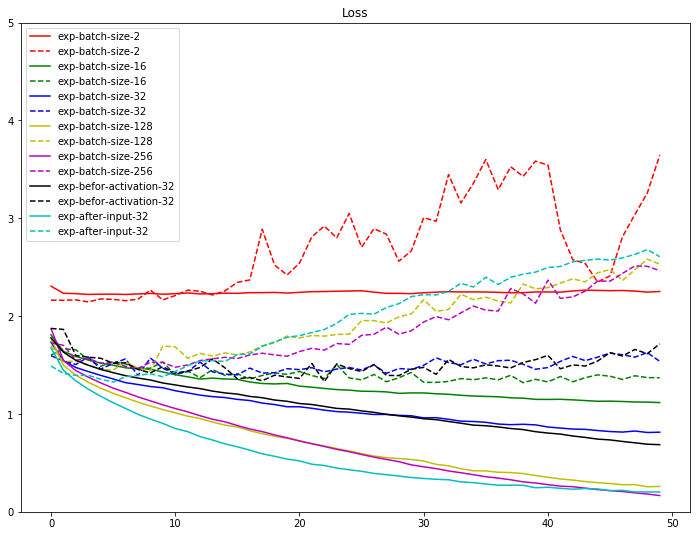

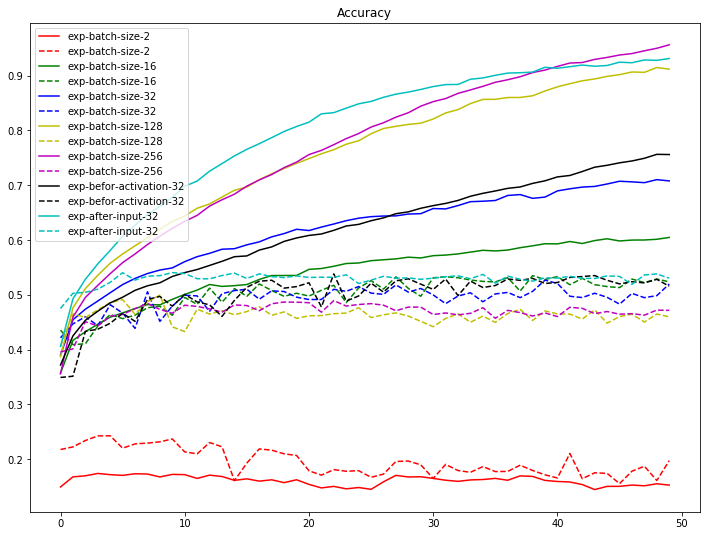

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c"]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()